# Creating tables with matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
column = ['Senal length', 'Senal width', 'Petal length', 'Petal width', 'Class label']
df = pd.read_csv('iris.data', names=column)
df.head(-10)

,Senal length,Senal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
137,6.4,3.1,5.5,1.8,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


In [3]:
df.describe()

,Senal length,Senal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


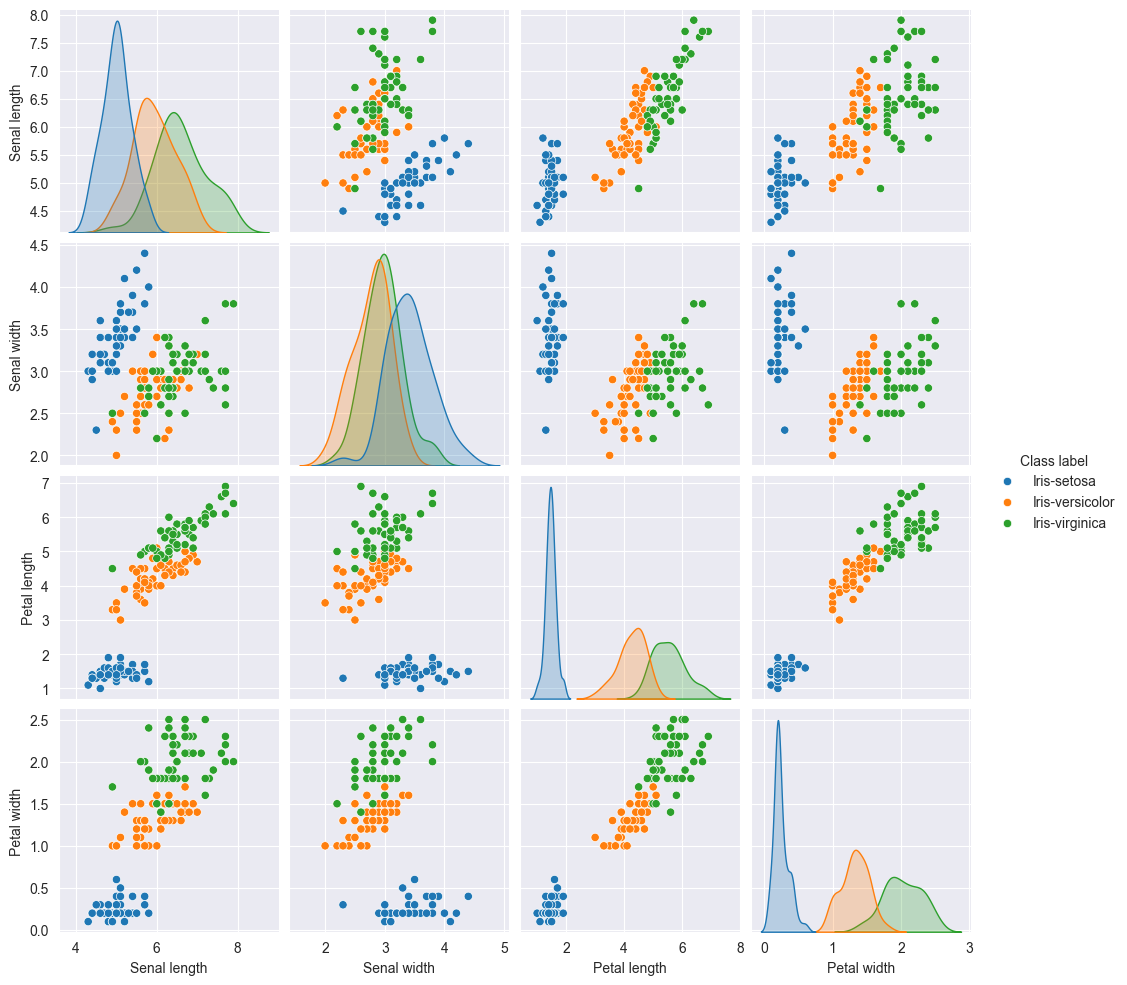

In [4]:
sns.pairplot(df, hue='Class label')

In [5]:
data = df.values
X = data[:,0:4]
Y = data[:,4]
Y_data = np.array([np.average(X[:,i][Y==j].astype('float32')) for i in range(X.shape[1]) for j in np.unique(Y)])
Y_data_reshaped = Y_data.reshape(4,3)
Y_data_reshaped = np.swapaxes(Y_data_reshaped,0,1)
X_axis = np.arange(len(column)-1)
width = 0.25

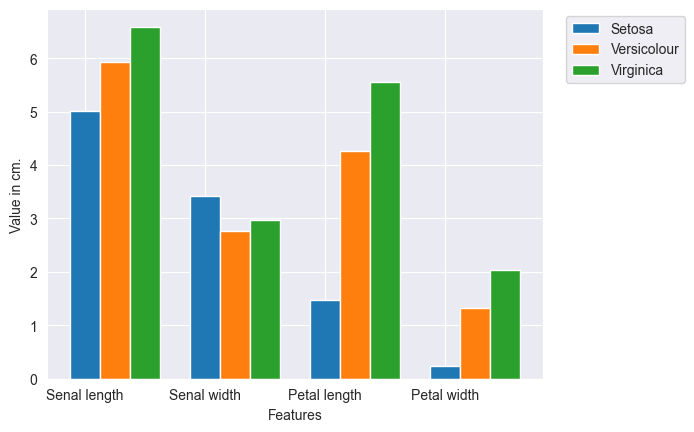

In [6]:
plt.bar(X_axis,Y_data_reshaped[0], width,label = 'Setosa')
plt.bar(X_axis+width,Y_data_reshaped[1],width,label ='Versicolour')
plt.bar(X_axis+width*2,Y_data_reshaped[2],width,label ='Virginica')
plt.xticks(X_axis,column[:4])
plt.xlabel('Features')
plt.ylabel('Value in cm.')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
svn = SVC()
svn.fit(X_train, Y_train)
prediction = svn.predict(X_test)
accuracy_score(Y_test, prediction)

0.9666666666666667

In [8]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30


In [9]:
X_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
prediction = svn.predict(X_new)
print(f'Prediction of species:\t{prediction}')

Prediction of species:	['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']
